In [19]:
# Importing required packages
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# Reading image using opencv->cv2
img = cv2.imread("Test_images/ShahRukh Khan.jpg")

In [21]:
# Image Shape
img.shape

(782, 550, 3)

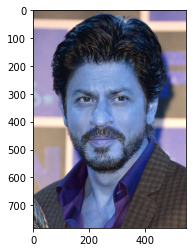

In [22]:
# Show image
plt.imshow(img)

In [23]:
# Convert image to gray as opencv can work only on the gray scale images
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
gray.shape
gray

array([[ 99, 101, 102, ..., 147, 147, 146],
       [ 96,  99, 101, ..., 146, 147, 147],
       [ 97,  98,  99, ..., 146, 147, 147],
       ...,
       [ 51,  73,  56, ...,  64,  67,  76],
       [ 64,  58,  70, ...,  52,  68,  58],
       [ 59,  64,  62, ...,  50,  64,  81]], dtype=uint8)

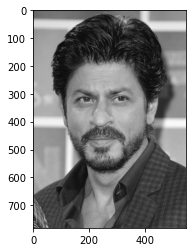

In [24]:
plt.imshow(gray , cmap = "gray")

In [25]:
# These are the cascade classifier APIs to detect face and eyes
face_cascade = cv2.CascadeClassifier("OpenCV/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("OpenCV/haarcascades/haarcascade_eye.xml")

In [26]:
faces = face_cascade.detectMultiScale(gray , 1.3 , 5)
# DetectMultiScale will give the (x,y,w,h) coordinated of the location of the face in the image
faces

array([[ 75, 184, 361, 361]])

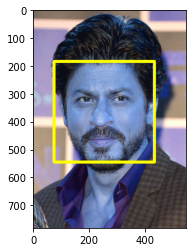

In [27]:
# Forming a rectangle around the detected face
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img , (x,y) , (x+w , y+h) , (255,255,0) , 10)
    plt.imshow(face_img)

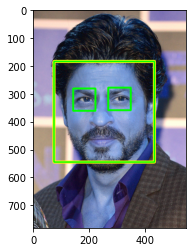

In [28]:
# Forming a rectangle around the face and eyes
for (x,y,w,h) in faces:
        cv2.rectangle(img , (x ,y) , (x+w , y+h) , (0,255,0) , 3)
        roi_gray = gray[y:y+h , x:x+w]
        roi_color = img[y:y+h , x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for(ex , ey , ew , eh) in eyes:
            cv2.rectangle(roi_color , (ex , ey) , (ex+ew , ey+eh) , (0,255,0) , 5)
plt.imshow(face_img, cmap = "gray")
plt.show()

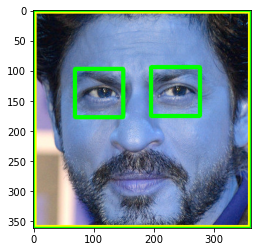

In [29]:
# Cropped Image
%matplotlib inline
plt.imshow(roi_color , cmap = 'gray')

In [30]:
# Defining a function which can crop face from images.
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray , 1.3 , 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h , x:x+w]
        roi_color = img[y:y+h , x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2: # If eyes in the image equal to 2 or greater than the function return the region of interest(roi)
            return roi_color
        # If the two eyes are not visible the function will not return anything

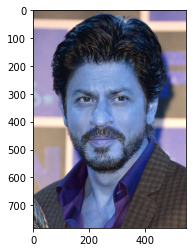

In [31]:
# Original Image
original_image = cv2.imread("Test_images/ShahRukh Khan.jpg")
plt.imshow(original_image)

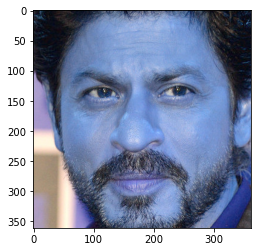

In [32]:
# Cropped Image using defined function
cropped_image = get_cropped_image_if_2_eyes("Test_images/ShahRukh Khan.jpg")
plt.imshow(cropped_image)

In [33]:
# Giving paths
path_to_data = "./Datasets/"
path_to_crop_data = "./Datasets/cropped/"

In [34]:
# Using OS (Operating System) to directly add or remove folders and datasets
import os
img_dirs = []
for entry in os.scandir(path_to_data): # Scanned the directory if it exist or not
    if entry.is_dir():
        img_dirs.append(entry.path)


In [35]:
img_dirs

['./Datasets/cropped',
 './Datasets/elonmusk',
 './Datasets/lionelmessi',
 './Datasets/ratantata',
 './Datasets/srk',
 './Datasets/viratkholi']

In [36]:
import shutil
if os.path.exists(path_to_crop_data): # check If the folder path exists then it remove the exists folder & make a new path dir.
    shutil.rmtree(path_to_crop_data)
os.mkdir(path_to_crop_data)

In [37]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1] 
    # Split the image and gives the name of the image
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_crop_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            # It gives the name of the images using name of the celebrity then no. according to sequence and png
            
            cv2.imwrite(cropped_file_path, roi_color) # Use to save image into new file
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1 
# Avoid special characters, languages except English in the names of the images otherwise cause error 

cropped
elonmusk
Generating cropped images in folder:  ./Datasets/cropped/elonmusk
lionelmessi
Generating cropped images in folder:  ./Datasets/cropped/lionelmessi
ratantata
Generating cropped images in folder:  ./Datasets/cropped/ratantata
srk
Generating cropped images in folder:  ./Datasets/cropped/srk
viratkholi
Generating cropped images in folder:  ./Datasets/cropped/viratkholi


In [38]:
cropped_img = np.array(roi_color)
cropped_img.shape

(106, 106, 3)

In [39]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

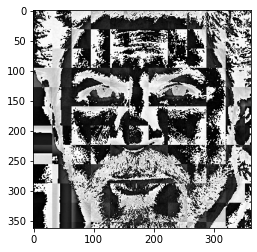

In [40]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [41]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'elonmusk': ['./Datasets/cropped/elonmusk\\elonmusk1.png',
  './Datasets/cropped/elonmusk\\elonmusk10.png',
  './Datasets/cropped/elonmusk\\elonmusk11.png',
  './Datasets/cropped/elonmusk\\elonmusk12.png',
  './Datasets/cropped/elonmusk\\elonmusk13.png',
  './Datasets/cropped/elonmusk\\elonmusk14.png',
  './Datasets/cropped/elonmusk\\elonmusk15.png',
  './Datasets/cropped/elonmusk\\elonmusk16.png',
  './Datasets/cropped/elonmusk\\elonmusk17.png',
  './Datasets/cropped/elonmusk\\elonmusk18.png',
  './Datasets/cropped/elonmusk\\elonmusk19.png',
  './Datasets/cropped/elonmusk\\elonmusk2.png',
  './Datasets/cropped/elonmusk\\elonmusk20.png',
  './Datasets/cropped/elonmusk\\elonmusk21.png',
  './Datasets/cropped/elonmusk\\elonmusk22.png',
  './Datasets/cropped/elonmusk\\elonmusk23.png',
  './Datasets/cropped/elonmusk\\elonmusk24.png',
  './Datasets/cropped/elonmusk\\elonmusk25.png',
  './Datasets/cropped/elonmusk\\elonmusk26.png',
  './Datasets/cropped/elonmusk\\elonmusk27.png',
  './Datas

In [42]:
# Gives the unique no.(integers) to each of the celebrities 
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'elonmusk': 0, 'lionelmessi': 1, 'ratantata': 2, 'srk': 3, 'viratkholi': 4}

In [43]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [44]:
len(X[0])

4096

In [45]:
X = np.array(X).reshape(len(X) , 4096).astype(float)

In [46]:
X.shape

(201, 4096)

In [47]:
X[0]

array([  3.,   1.,   1., ..., 138., 211., 210.])

## Data Cleaning Process is done

### Now we can train our model now for this case we'll be using SVM

In [48]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [49]:
X_train , X_test , y_train  , y_test = train_test_split(X ,y , random_state=0)

In [50]:
pipe = Pipeline([('scaler' , StandardScaler()) , ('svc' , SVC(kernel = 'rbf' , C =10))])
pipe.fit(X_train , y_train)
pipe.score(X_test , y_test)

0.7450980392156863

In [51]:
print(classification_report(y_test , pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.82      0.76        17
           1       1.00      0.86      0.92         7
           2       0.71      0.83      0.77        12
           3       0.57      0.50      0.53         8
           4       1.00      0.57      0.73         7

    accuracy                           0.75        51
   macro avg       0.80      0.72      0.74        51
weighted avg       0.77      0.75      0.74        51



## Use Grid Search to try out different models with different parameters . Goal is to come up with best model

In [52]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [53]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [54]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.773333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.673333,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.760000,{'logisticregression__C': 10}


In [55]:
best_estimators['svm'].score(X_test,y_test)

0.7647058823529411

In [56]:
best_estimators['random_forest'].score(X_test,y_test)

0.5882352941176471

In [57]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7254901960784313

In [58]:
best_clf = best_estimators['svm']


In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[15,  0,  2,  0,  0],
       [ 1,  5,  0,  1,  0],
       [ 1,  0, 10,  1,  0],
       [ 2,  1,  0,  5,  0],
       [ 1,  0,  0,  2,  4]], dtype=int64)

Text(69.0, 0.5, 'Truth')

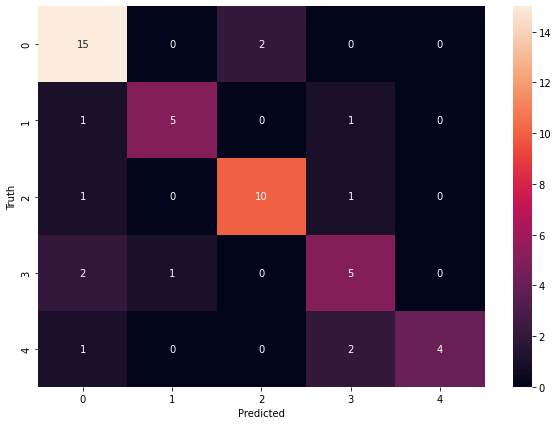

In [60]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
class_dict

{'elonmusk': 0, 'lionelmessi': 1, 'ratantata': 2, 'srk': 3, 'viratkholi': 4}

## Save the trained model

In [62]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

## Save class dictionary


In [63]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))
# Save the class_dict into json